## Study 2 - Figure 3
#### Patrick M Donnelly
#### University of Washington
#### 16 November 2020

In [1]:
# import necessary databases and libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.stats import linregress
from matplotlib import cm
#from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict()
plt.rcParams['pdf.fonttype'] = 42

In [3]:
# import data
data = pd.read_csv('data/study2/study2_widedata.csv')
data['decoding_acc'] = np.nan
for ii in range(0, len(data['record_id'])):
    data.loc[ii,'decoding_acc'] = np.mean([data['word_acc'][ii], data['pseudo_acc'][ii]])

In [4]:
violin_data = data[(data.int_session == 1) | (data.int_session == 3)].reset_index()

In [5]:
violin_data['violin_axis'] = np.nan

for record in range(0, len(violin_data.record_id)):
    if violin_data.pigs_casecontrol[record] == 0:
        if violin_data.int_session[record] == 1:
            violin_data.loc[record, 'violin_axis'] = -0.10
        elif violin_data.int_session[record] == 3:
            violin_data.loc[record, 'violin_axis'] = 0.10
    elif violin_data.pigs_casecontrol[record] == 1:
        if violin_data.int_session[record] == 1:
            violin_data.loc[record, 'violin_axis'] = 0.90          
        elif violin_data.int_session[record] == 3:
            violin_data.loc[record, 'violin_axis'] = 1.10
        

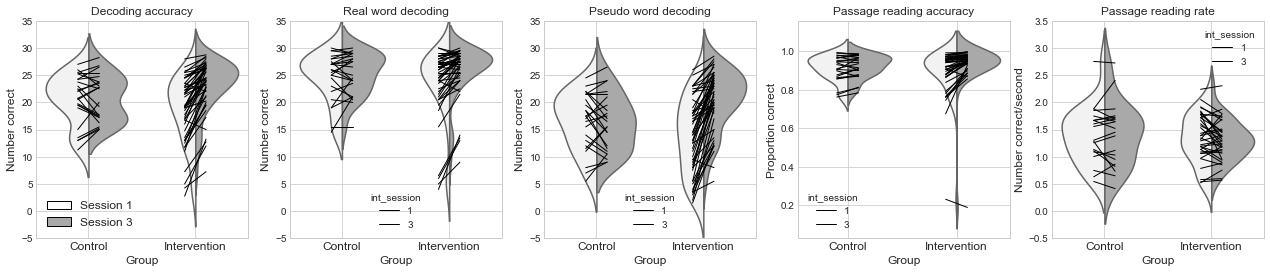

In [6]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(22,4))

g = sns.violinplot(x="pigs_casecontrol", y="decoding_acc",hue='int_session',
               data = violin_data, split=True, inner=None, color='darkgrey', ax=ax1)

for record in range(0, len(violin_data.record_id.unique())):
    data = violin_data[violin_data.record_id == violin_data.record_id.unique()[record]]
    data.groupby(['violin_axis'])['decoding_acc'].mean().plot(kind='line', colormap='copper',linewidth=1, ax=ax1)
    

white_patch = mpatches.Patch(facecolor='white', label='Session 1', edgecolor="black")
gray_patch = mpatches.Patch(facecolor='darkgrey', label='Session 3', edgecolor="black")


ax1.set_title("Decoding accuracy", fontsize=12)
ax1.set_xlabel("Group", fontsize=12)
ax1.set_ylabel("Number correct", fontsize=12)
ax1.set_xticklabels(["Control", "Intervention"], fontsize=12)
ax1.legend(handles=[white_patch, gray_patch], loc='lower left', fontsize=12)
ax1.set_ylim([-5,35])


g = sns.violinplot(x="pigs_casecontrol", y="word_acc",hue='int_session',
               data = violin_data, split=True, inner=None, color='darkgrey', legend=False,ax=ax2)

for record in range(0, len(violin_data.record_id.unique())):
    data = violin_data[violin_data.record_id == violin_data.record_id.unique()[record]]
    data.groupby(['violin_axis'])['word_acc'].mean().plot(kind='line', colormap='copper',linewidth=1, legend=False,ax=ax2)
    

ax2.set_title("Real word decoding", fontsize=12)
ax2.set_xlabel("Group", fontsize=12)
ax2.set_ylabel("Number correct", fontsize=12)
ax2.set_xticklabels(["Control", "Intervention"], fontsize=12)
ax2.set_ylim([-5,35])


g = sns.violinplot(x="pigs_casecontrol", y="pseudo_acc",hue='int_session',
               data = violin_data, split=True, inner=None, color='darkgrey', ax=ax3)

for record in range(0, len(violin_data.record_id.unique())):
    data = violin_data[violin_data.record_id == violin_data.record_id.unique()[record]]
    data.groupby(['violin_axis'])['pseudo_acc'].mean().plot(kind='line', colormap='copper',linewidth=1, ax=ax3)
    

ax3.set_title("Pseudo word decoding", fontsize=12)
ax3.set_xlabel("Group", fontsize=12)
ax3.set_ylabel("Number correct", fontsize=12)
ax3.set_xticklabels(["Control", "Intervention"], fontsize=12)
ax3.set_ylim([-5,35])


g = sns.violinplot(x="pigs_casecontrol", y="first_acc",hue='int_session',
               data = violin_data, split=True, inner=None, color='darkgrey', ax=ax4)

for record in range(0, len(violin_data.record_id.unique())):
    data = violin_data[violin_data.record_id == violin_data.record_id.unique()[record]]
    data.groupby(['violin_axis'])['first_acc'].mean().plot(kind='line', colormap='copper',linewidth=1, ax=ax4)
    

ax4.set_title("Passage reading accuracy", fontsize=12)
ax4.set_xlabel("Group", fontsize=12)
ax4.set_ylabel("Proportion correct", fontsize=12)
ax4.set_xticklabels(["Control", "Intervention"], fontsize=12)


g = sns.violinplot(x="pigs_casecontrol", y="second_rate",hue='int_session',
               data = violin_data, split=True, inner=None, color='darkgrey', ax=ax5)

for record in range(0, len(violin_data.record_id.unique())):
    data = violin_data[violin_data.record_id == violin_data.record_id.unique()[record]]
    data.groupby(['violin_axis'])['second_rate'].mean().plot(kind='line', colormap='copper',linewidth=1,ax=ax5)
    
ax5.set_title("Passage reading rate", fontsize=12)
ax5.set_xlabel("Group", fontsize=12)
ax5.set_ylabel("Number correct/second", fontsize=12)
ax5.set_xticklabels(["Control", "Intervention"], fontsize=12)
ax5.set_ylim([-0.5,3.5])
